# `Important Library`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# `Loading the Dataset`

In [2]:
half = pd.read_csv("https://raw.githubusercontent.com/saikatsam11/AIT-511-ML-Projects/main/Project_I/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/saikatsam11/AIT-511-ML-Projects/main/Project_I/test.csv")
obesity = pd.read_csv("https://raw.githubusercontent.com/saikatsam11/AIT-511-ML-Projects/main/Project_I/ObesityDataSet.csv")

obesity.rename(columns={'NObeyesdad': 'WeightCategory'}, inplace=True)

combined = pd.concat([half, obesity], ignore_index=True)

train = combined.drop_duplicates(ignore_index=True)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (17620, 18)
Test shape: (5225, 17)


`As per the competition instructions, we have incorporated the original dataset along with the provided training data. This allows us to explore differences in distribution and also assess whether including the original data improves model performance. All summary statistics and distributions reported in this section are computed on the combined dataset.`

# `Data Preprocessing`

## `Statistical Description of the Numerical Data`

In [3]:
train.iloc[:, 1:].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000
mean,23.879887,1.700245,87.675486,2.440376,2.753408,2.024916,0.981213,0.619643
std,5.753688,0.088343,26.349050,0.531381,0.713832,0.607826,0.838884,0.603121
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630927,66.000000,2.000000,3.000000,1.751700,0.015860,0.000000
50%,22.777890,1.700000,84.000000,2.348745,3.000000,2.000000,1.000000,0.579541
75%,26.000000,1.763215,111.275646,3.000000,3.000000,2.530035,1.592494,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# `Adding a new feature` `BMI` Using `Height` & `Weight`

In [5]:
train['BMI'] = train['Weight'] / ((train['Height'])**2)
test['BMI'] = test['Weight'] / ((test['Height'])**2)

In [6]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [7]:
num_cols = ['Age','Height','Weight','FCVC', 'NCP','CH2O','FAF','TUE','BMI']
cat_cols = ['Gender','family_history_with_overweight','FAVC','CAEC', 'SCC' ,'SMOKE','CALC','MTRANS']

In [8]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


# `Exploratory Data Analysis`

## `Distribution of the Numerical Features`

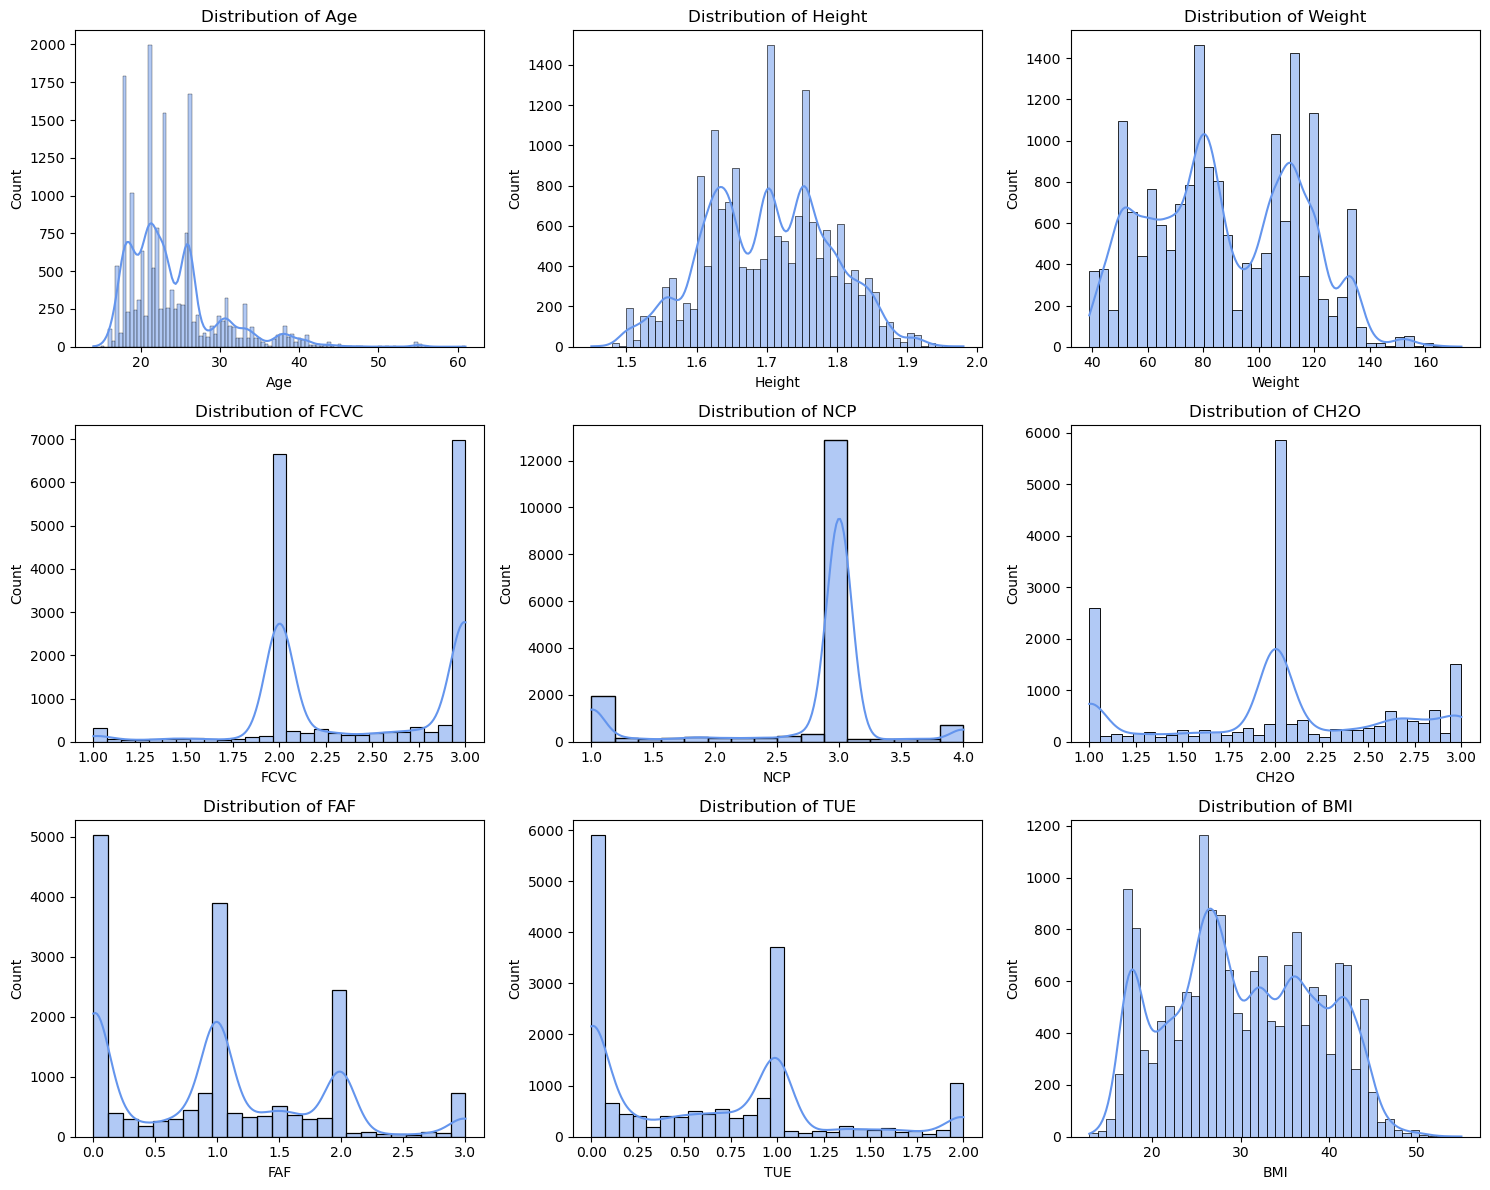

In [9]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[col], kde=True, color='cornflowerblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# `Distribution of the Categorical Plots`

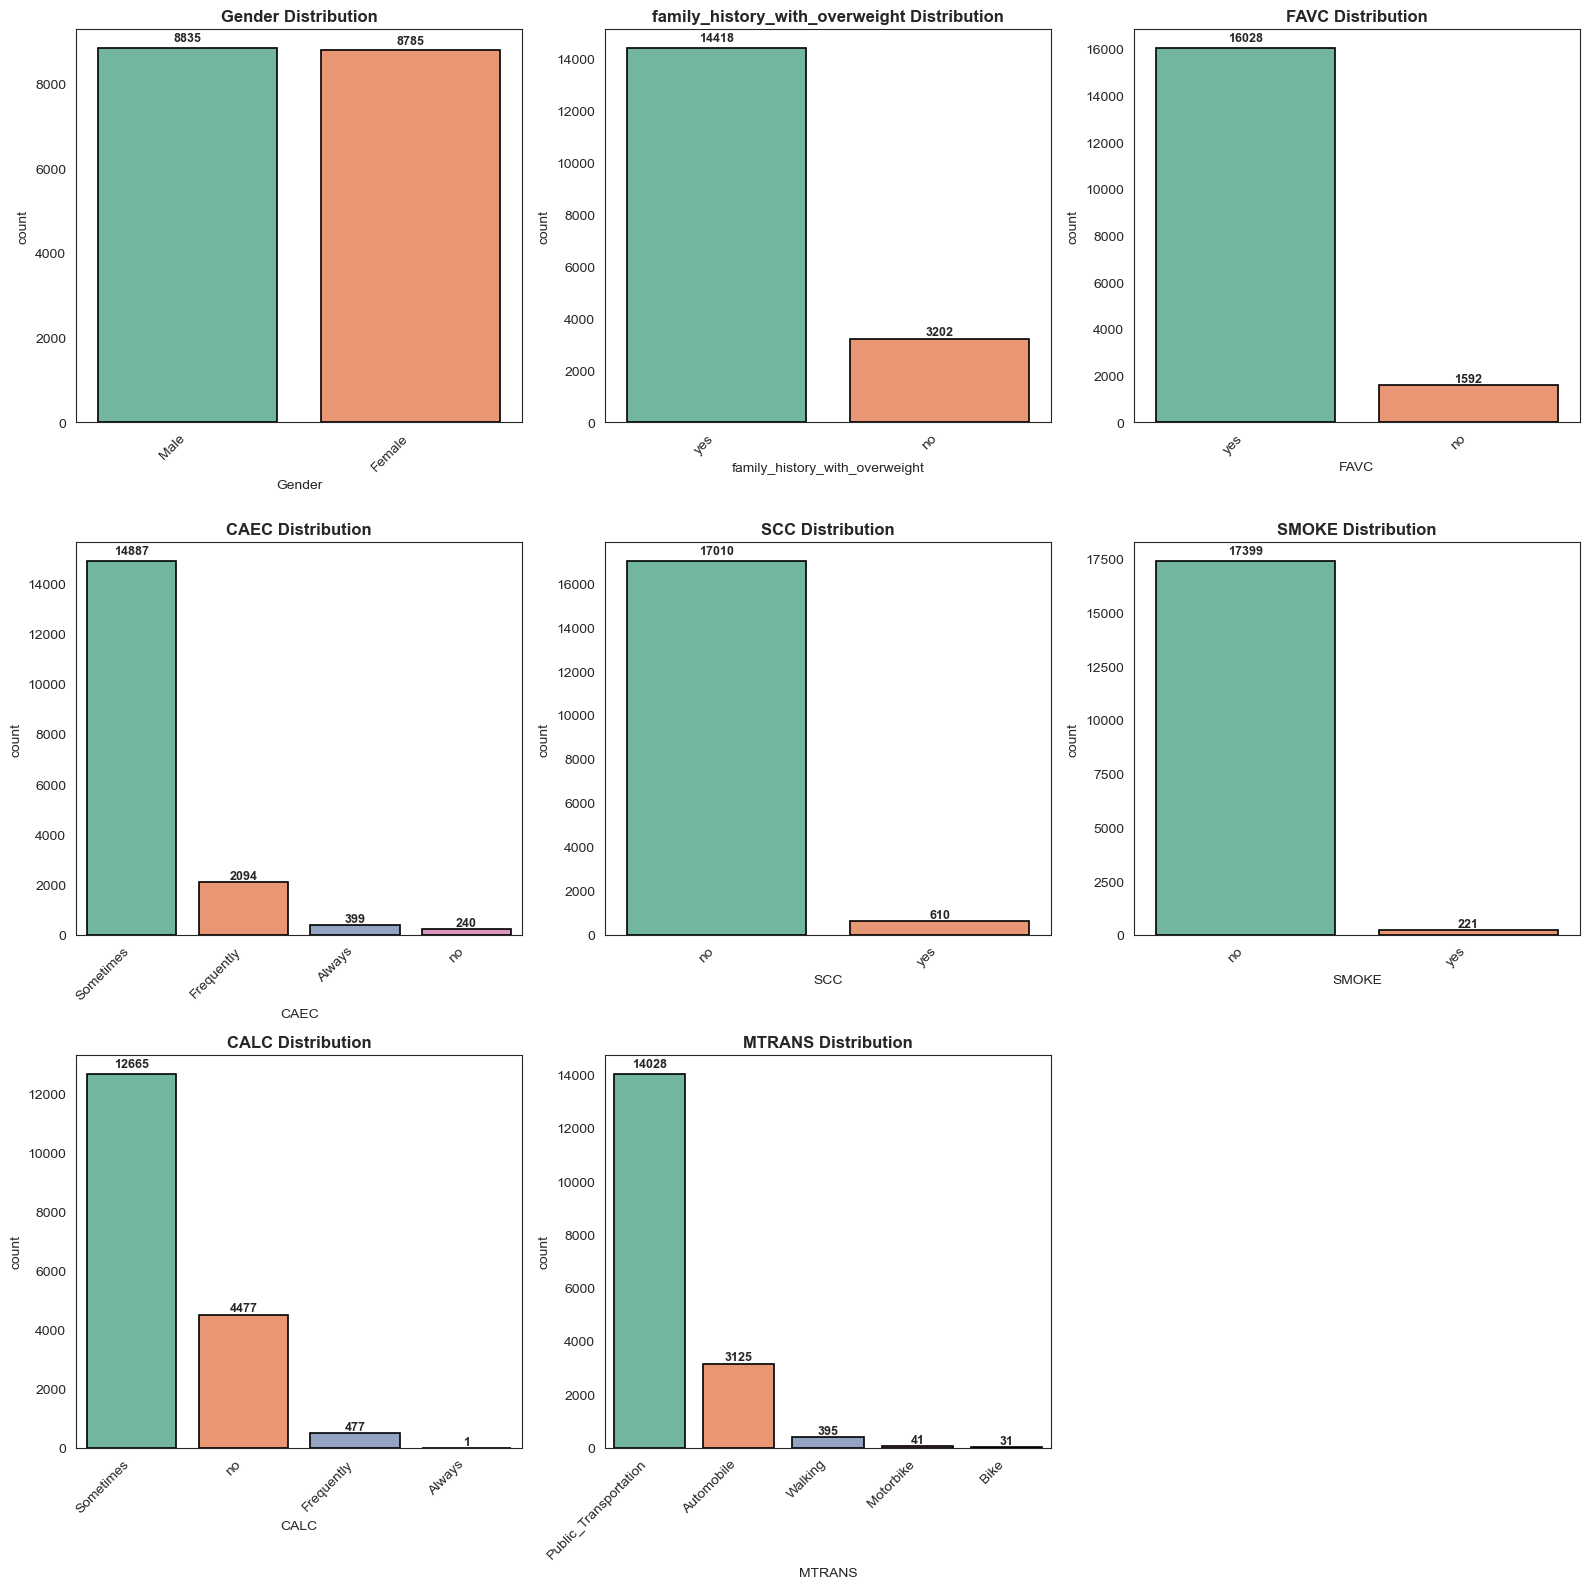

In [10]:
plt.figure(figsize=(16, 16))
sns.set_style("white")

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=train,x=col,palette="Set2",order=train[col].value_counts().index,edgecolor='black',
        linewidth=1.2)    
    plt.title(f"{col} Distribution", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,height + (0.01 * height),f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# `Distribution of the Target Variable (WeightCategory)`

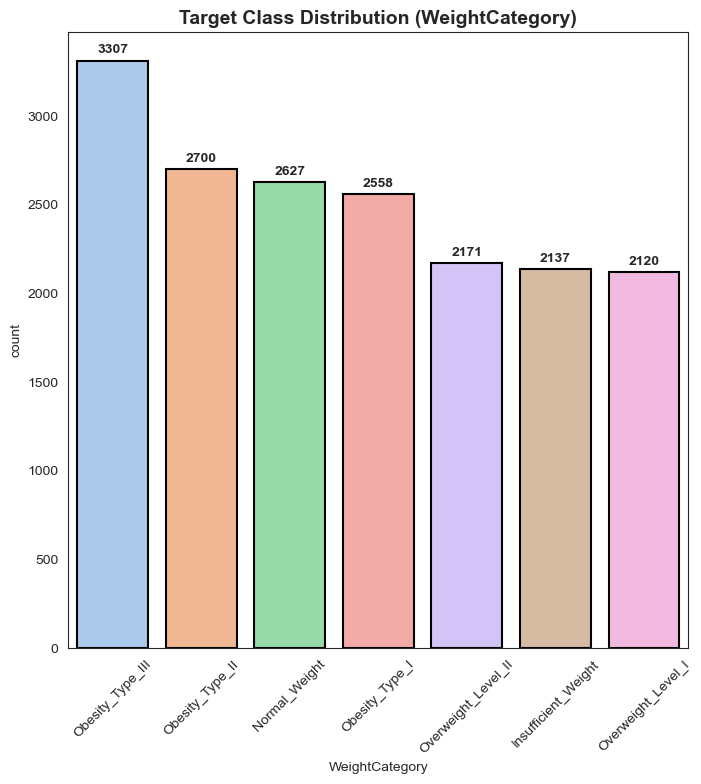

In [11]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=train,x='WeightCategory',order=train['WeightCategory'].value_counts().index,palette='pastel',
                   edgecolor='black',linewidth=1.5)
plt.title("Target Class Distribution (WeightCategory)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01 * height,f'{int(height)}',ha='center',va='bottom',fontsize=10,
        fontweight='bold')
plt.show()

# `BoxPlots for Numerical Features vs WeightCategory`

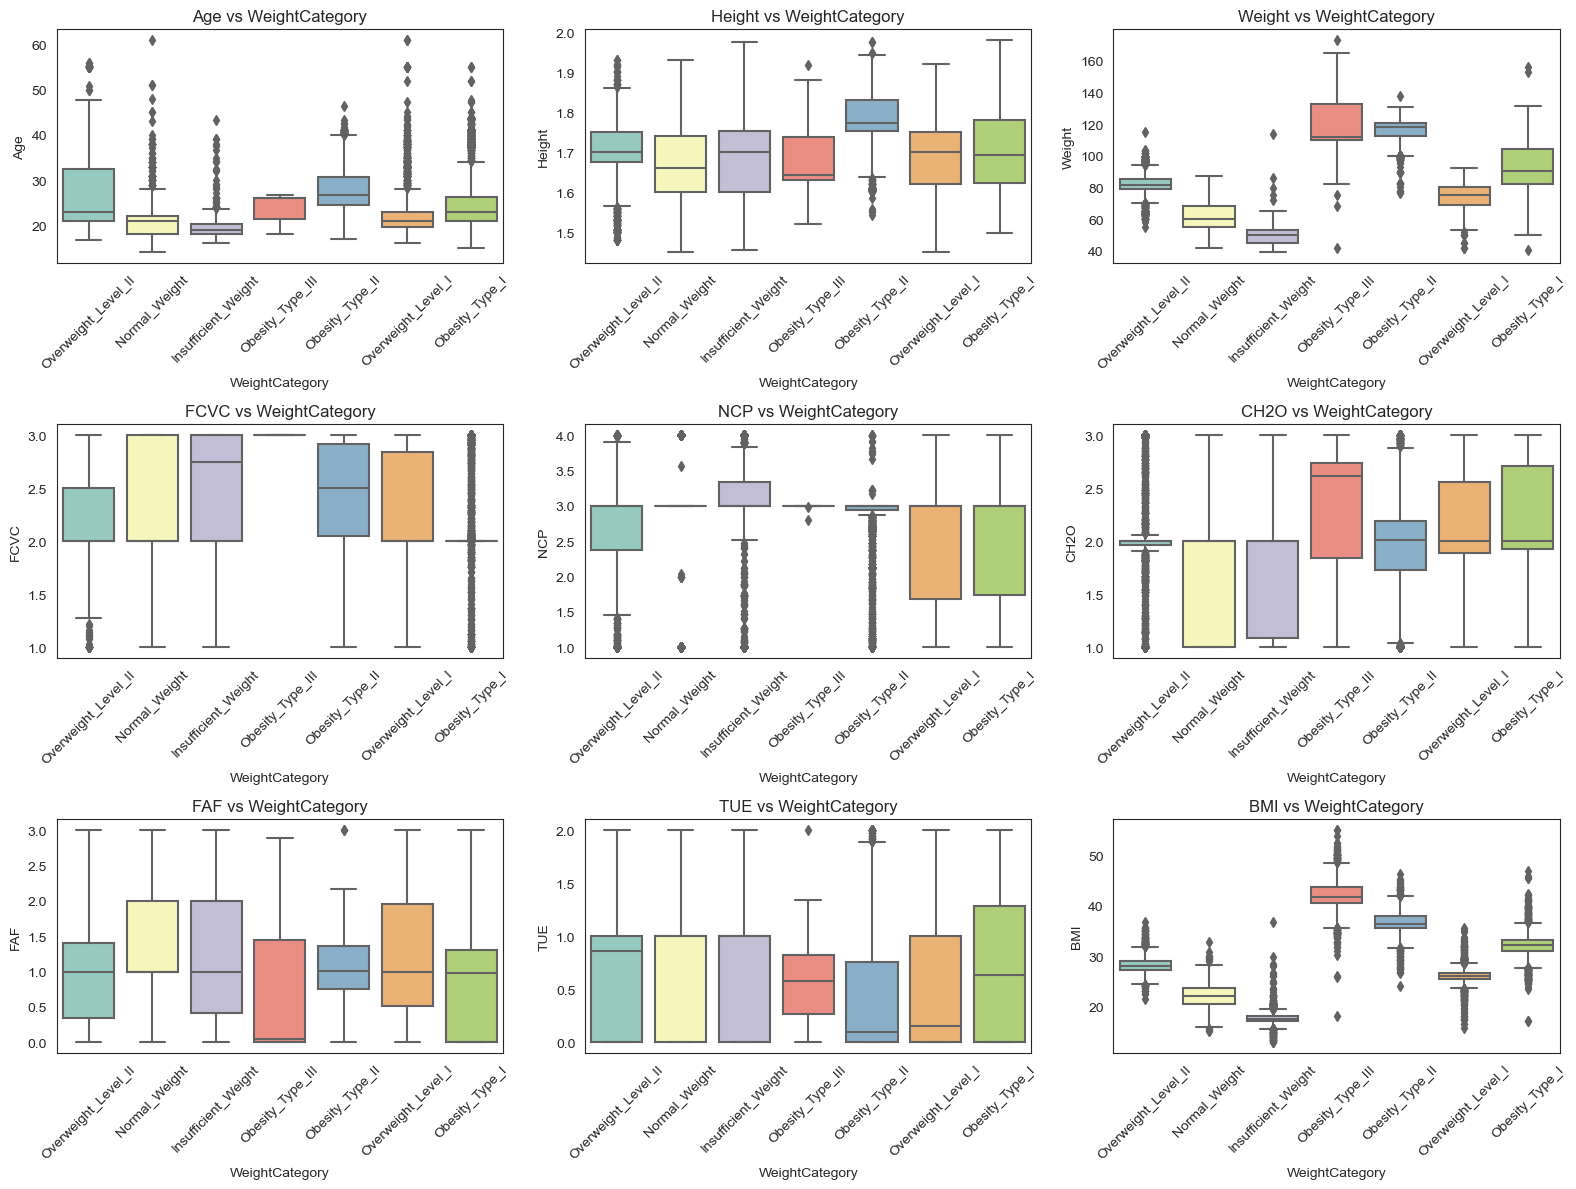

In [12]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train, x='WeightCategory', y=col, palette="Set3")
    plt.title(f"{col} vs WeightCategory")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# `Plots for Categorical vs WeightCategory`

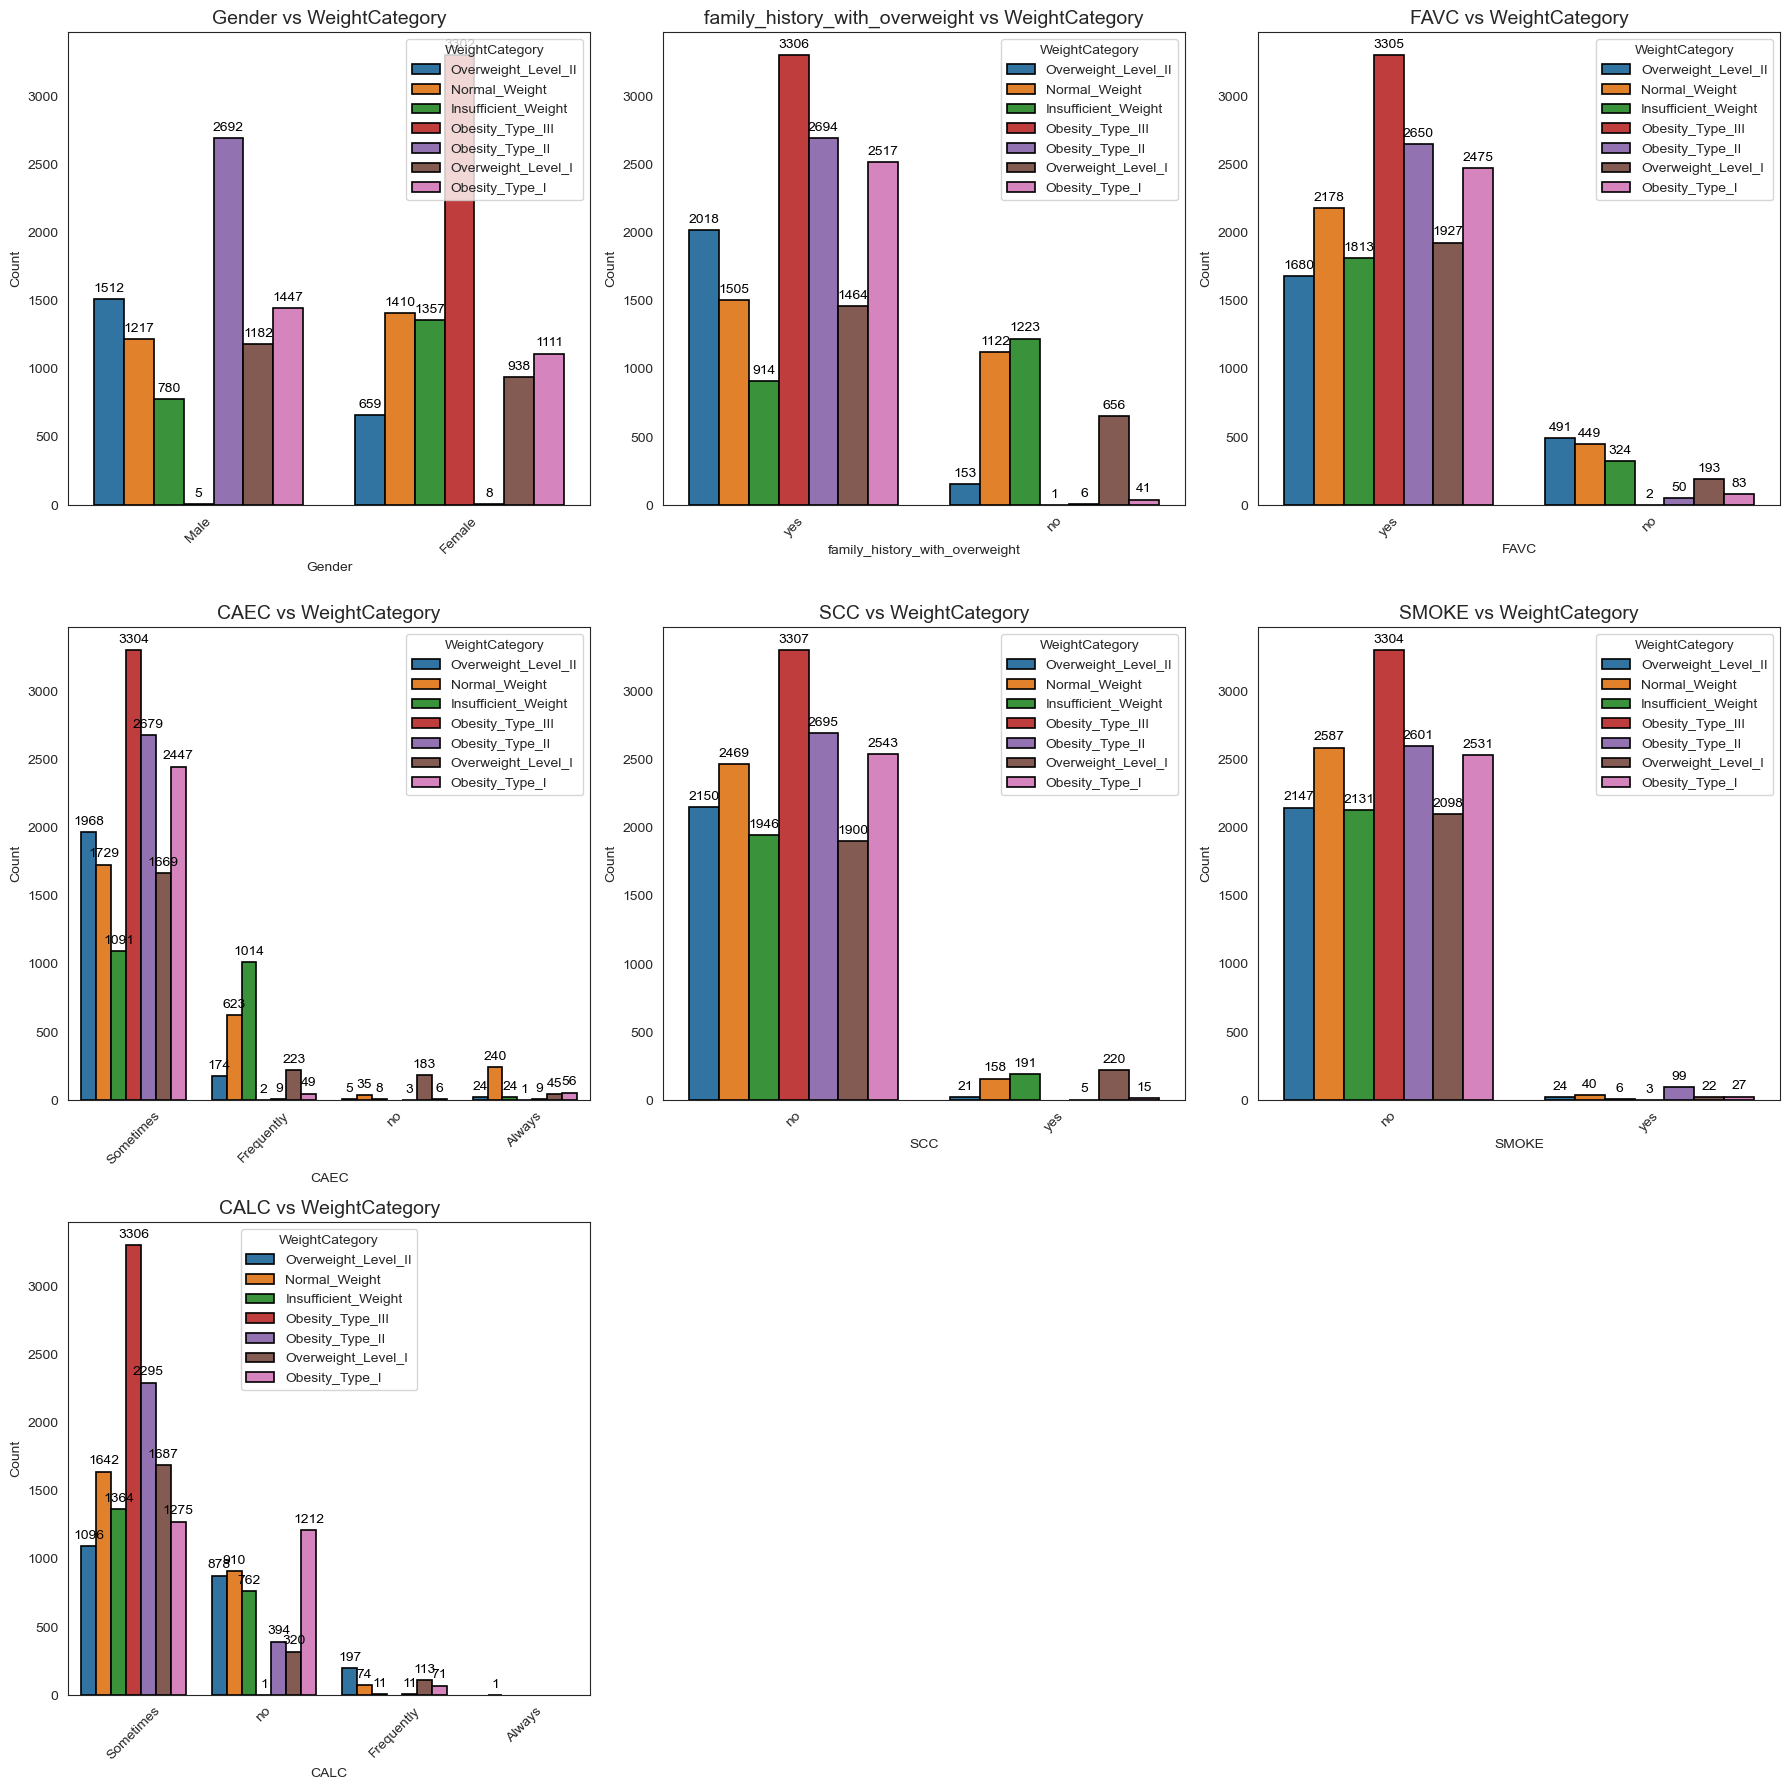

In [13]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(cat_cols[:-1]):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(data=train,x=col,hue='WeightCategory',palette="tab10",edgecolor='black',linewidth=1.2 )
    plt.title(f"{col} vs WeightCategory", fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, 
                color='black',xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()

# `Data Preprocessing`

## `Scaling the Numerical Features`

In [14]:
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

## `Encoding the Categorical Features`

In [15]:
for col in cat_cols:
    le = LabelEncoder()
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_data)
    
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

In [16]:
train['WeightCategory'] = le.fit_transform(train['WeightCategory'])

In [55]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,0.0,1,0.097875,-0.002792,-0.227929,1,1,-0.828762,0.322059,2,0,1.215278,0,-1.169698,0.591656,2,3,6,-0.229589
1,1.0,0,-1.021963,-1.587545,-1.164230,1,1,-0.828762,0.345459,1,0,-0.040994,0,0.022396,0.630666,3,0,1,-0.813697
2,2.0,0,-1.021963,0.126956,-1.423611,1,1,-1.053590,-1.879659,2,0,-0.188445,0,-0.137291,1.747529,3,3,0,-1.573842
3,3.0,0,-0.508758,0.118693,1.654731,1,1,1.053180,0.345459,2,0,-0.577247,0,0.580132,0.266216,2,3,4,1.774348
4,4.0,1,1.348946,2.421780,0.232371,1,1,0.450326,-1.095437,2,0,-0.074149,0,1.176310,0.517453,2,3,6,-0.550824


## `Correlation Heatmap between all the variables`

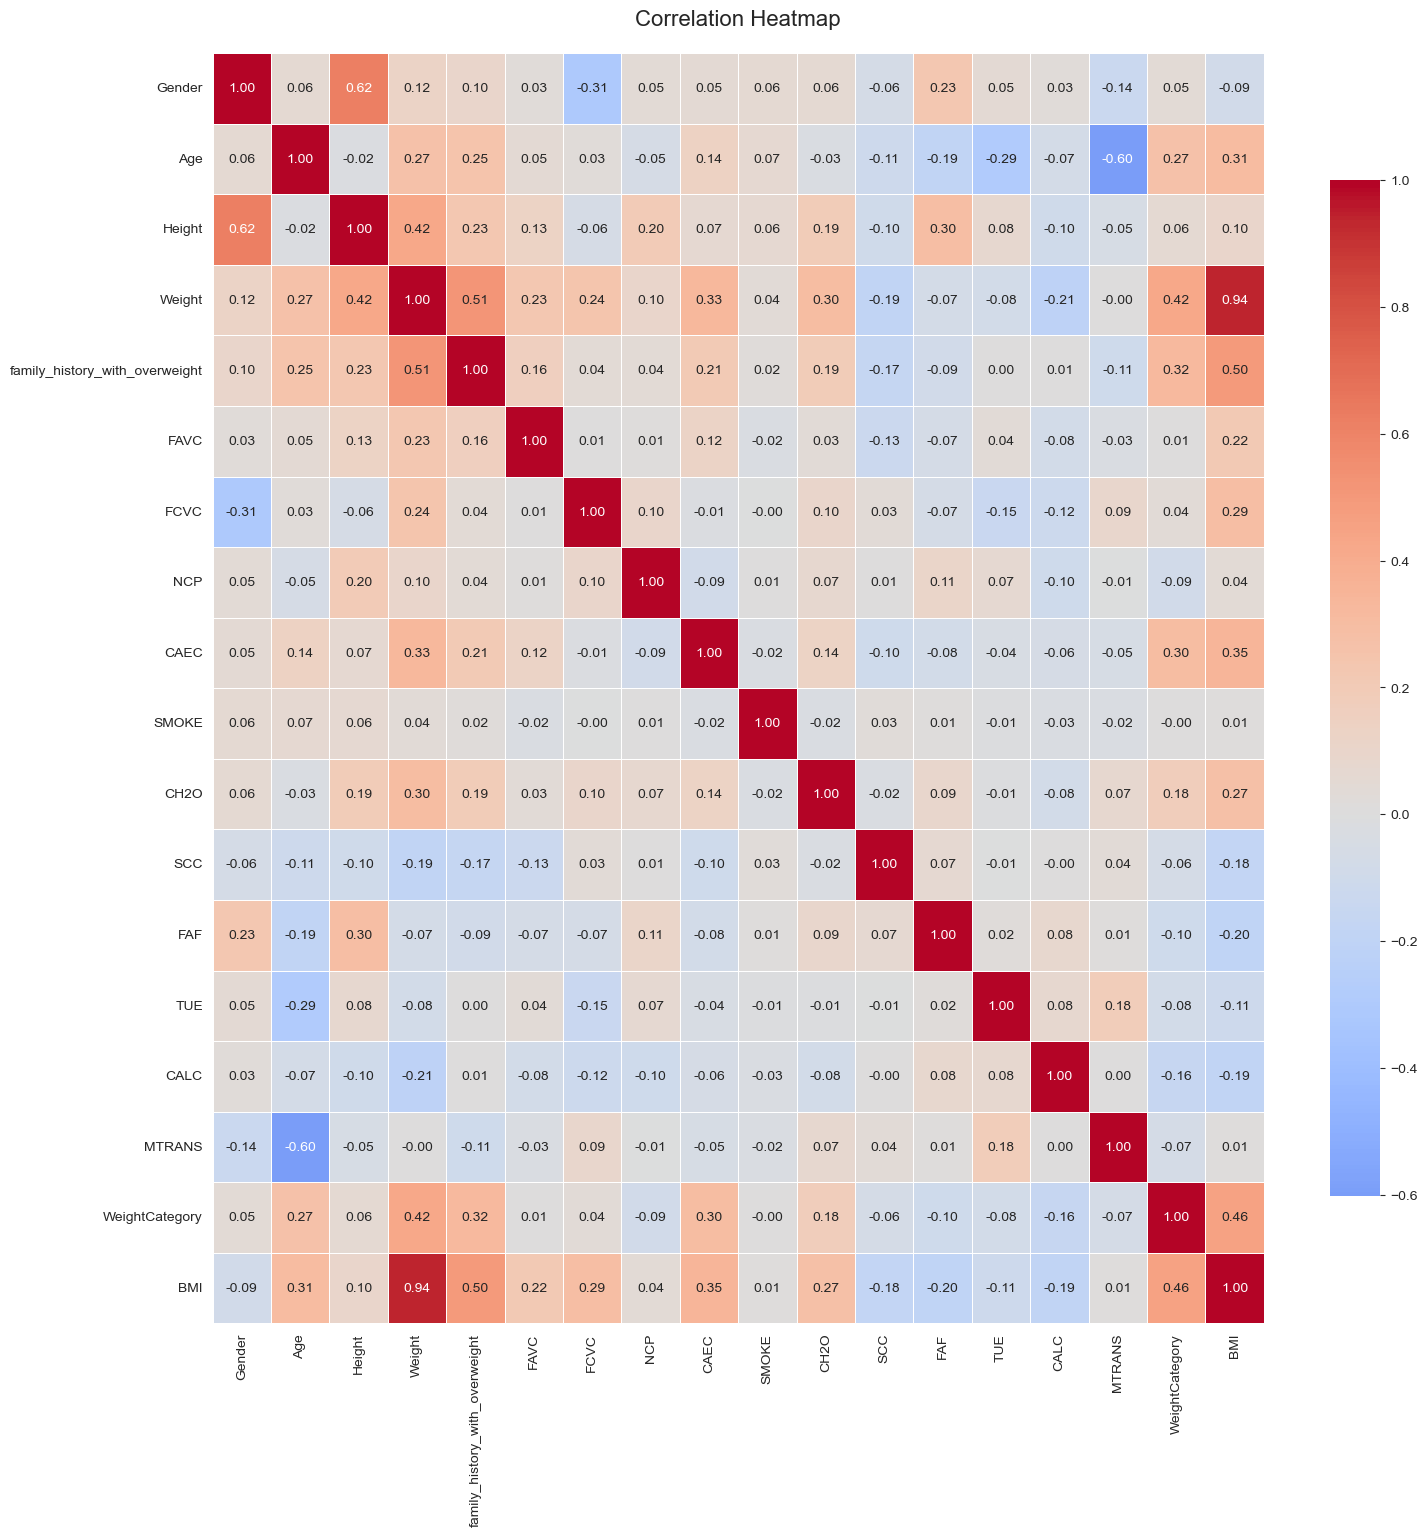

In [17]:
plt.figure(figsize=(16, 16))
sns.heatmap(
    train.iloc[:,1:].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)

plt.tight_layout(pad=3.0)
plt.show()

In [18]:
X = train[num_cols + cat_cols]
y = train['WeightCategory']

### Dropping - `SMOKE`, `MTRANS` cause they are `Less important features`

In [32]:
X = X.drop(['SMOKE', 'MTRANS'], axis=1)
X_test = test[num_cols + cat_cols]

In [33]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
num_classes = len(np.unique(y_train))
num_classes

7

# `Model Development & Evaluation`

### `K-Nearest Neighbourhood Model`  

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
knn_model = KNeighborsClassifier()

param_dist_knn = {'n_neighbors': np.arange(1,31),
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski'],
'p': [1,2]}

knn_random = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=50,
    scoring='accuracy',
    cv=skf,
    verbose=1,
    n_jobs=-1,
    random_state=42)

knn_random.fit(X_train, y_train)
print("Best KNN Params:", knn_random.best_params_)
print("Best KNN Accuracy (CV):", knn_random.best_score_)

best_knn = knn_random.best_estimator_
best_knn.fit(X_train, y_train)

knn_val_acc = best_knn.score(X_val, y_val)
print(f"Validation Accuracy (KNN): {knn_val_acc:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best KNN Params: {'weights': 'distance', 'p': 1, 'n_neighbors': 15, 'metric': 'minkowski'}
Best KNN Accuracy (CV): 0.8523693327194642
Validation Accuracy (KNN): 0.8641


### After submitting the CSV file we got `Test Accuracy : 0.86225`

### `Random Forest Model`

In [41]:
rf_model = RandomForestClassifier(random_state=42)

param_dist_rf = {'n_estimators': np.arange(100,500,50),
'max_depth': [None,5,10,15,20,30],
'min_samples_split': [2,5,10],
'min_samples_leaf': [1,2,4],
'bootstrap': [True,False],
'criterion': ['gini','entropy']}

rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=50,
    scoring='accuracy',
    cv=skf,
    verbose=1,
    n_jobs=-1,
    random_state=42)

rf_random.fit(X_train, y_train)
print("Best RF Params:", rf_random.best_params_)
print("Best RF Accuracy (CV):", rf_random.best_score_)

best_rf = rf_random.best_estimator_
best_rf.fit(X_train, y_train)

rf_val_acc = best_rf.score(X_val, y_val)
print(f"Validation Accuracy (RF): {rf_val_acc:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best RF Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}
Best RF Accuracy (CV): 0.9060731510343942
Validation Accuracy (RF): 0.9129


### After submitting the CSV file we got `Test Accuracy : 0.90358`

### `XGBoost Model`

In [36]:
best_params2 = {
    'n_estimators': [600, 700, 800, 900, 1000],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.03, 0.05, 0.07, 0.1],
    'subsample': [0.7, 0.8, 0.85, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0.001, 0.01, 0.1, 1],
    'reg_alpha': [0.001, 0.01, 0.1, 1]
}

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=best_params2,
    n_iter=50,
    scoring='accuracy',
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
print("Best XGB Accuracy (CV):", xgb_random.best_score_)

best_xgb = xgb_random.best_estimator_
best_xgb.fit(X_train, y_train)

xgb_val_acc = best_xgb.score(X_val, y_val)
print(f"Validation Accuracy (XGBoost): {xgb_val_acc:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGB Accuracy (CV): 0.9111097944797084
Validation Accuracy (XGBoost): 0.9183


In [37]:
tune_param_dist = {
    'n_estimators': [800],
    'max_depth': [3],
    'learning_rate': [0.07],
    'subsample': [0.85],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_lambda': [0.01],
    'reg_alpha': [0.01]
}
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    random_state=42,
    eval_metric='mlogloss')

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=tune_param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
print("Best XGB Accuracy (CV):", xgb_random.best_score_)

best_xgb = xgb_random.best_estimator_
best_xgb.fit(X_train, y_train)

xgb_val_acc = best_xgb.score(X_val, y_val)
print(f"Validation Accuracy (XGBoost): {xgb_val_acc:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best XGB Accuracy (CV): 0.9096200050820296
Validation Accuracy (XGBoost): 0.9180


In [29]:
predictions = best_xgb.predict(X_test)

In [30]:
final_labels = le.inverse_transform(predictions)

submission = pd.DataFrame({
    'id': test['id'],
    'WeightCategory': final_labels
})

submission.to_csv("boost4.csv", index=False)
submission.head()

,id,WeightCategory
0,15533,Obesity_Type_III
1,15534,Overweight_Level_I
2,15535,Overweight_Level_II
3,15536,Obesity_Type_II
4,15537,Normal_Weight


### After submitting the CSV file we got `Test Accuracy : 0.91294`

## So `XGBoost` outperform `RandomForest` & `K-Nearest Neighbourhood`.